**IA de Confiance**


*Répondre aux normes et aux exigences*

# 4. Méthodes locales agnostiques du modèles



## 4.1 Individual Conditional Expectation (ICE)

### 4.1.1 Théorie

Les **Individual Conditional Expectation (ICE) plots** permettent de visualiser comment la prédiction d'une instance individuelle évolue en fonction d'une caractéristique donnée du modèle. Contrairement aux **Partial Dependence Plots (PDPs)**, qui donnent un effet moyen d’une variable, les **ICE plots** montrent la dépendance de la prédiction pour **chaque instance**.

#### **Pourquoi utiliser les ICE plots ?**
Les **PDPs** donnent une vision **globale** de l'effet d'une variable, mais ils peuvent masquer des interactions complexes entre les caractéristiques. Si les interactions entre la variable étudiée et les autres variables sont faibles, le **PDP** résume bien la relation. **Mais si ces interactions sont fortes, les ICE plots sont indispensables**.

#### **Définition formelle**
Dans les **ICE plots**, pour chaque instance ${(x_S^{(i)}, x_C^{(i)})}_{i=1}^{N}$, la courbe $\hat{f}^{(i)}_S$ est tracée en fonction de $x_S^{(i)}$, tandis que $x_C^{(i)}$ reste fixé.

---

### 4.1.3 Centered ICE Plot

Un problème des **ICE plots** est que les courbes peuvent commencer à **des prédictions différentes**, ce qui rend difficile la comparaison. Une solution simple consiste à **centrer les courbes** autour d’une valeur de référence, généralement **le minimum observé**.  

L'**equation du c-ICE** est la suivante :

$$ \hat{f}^{(i)}_{\text{cent}} = \hat{f}^{(i)} - \hat{f}(x_a, x_C^{(i)}) $$

où $x_a$ est le **point d’ancrage** (typiquement la valeur minimale de la variable étudiée).

#### **Exemple 2 : Centered ICE plot pour la prédiction du cancer**
**Figure 9.3 : Centered ICE plot de la probabilité de cancer en fonction de l'âge.**  
Toutes les lignes sont fixées à **0** à l'âge **14 ans**. Cela permet d'observer les évolutions relatives par rapport à cette base.

---

### 4.1.4 Derivative ICE Plot (d-ICE)

Une autre façon d'analyser la variabilité des prédictions est d'étudier leur **dérivée** par rapport à la variable étudiée. Cela permet d’identifier les régions où la prédiction change fortement.

L'équation de la **dérivée ICE** est :

$$ \frac{\delta \hat{f}(x)}{\delta x_S} = g'(x_S) $$

- **Si les dérivées sont constantes**, cela signifie qu’il n’y a **pas d’interaction**.
- **Si les dérivées diffèrent**, cela signifie qu’il y a des **interactions non linéaires**.

L'**inconvénient** de cette approche est qu’elle **nécessite beaucoup de calculs** et devient **impraticable** sur des modèles complexes.

---

### 4.1.5 Pratique – Implémentation en Python

Nous allons maintenant coder les **ICE plots**, **c-ICE plots** et **d-ICE plots** en utilisant le dataset du cancer du col de l’utérus disponible à l’URL `url_cancer`.

### 4.1.2 Exemples

Nous allons appliquer les **ICE plots** à deux modèles :
- Un **random forest** prédisant la probabilité de cancer du col de l’utérus en fonction de l’âge.
- Un **random forest** prédisant le nombre de vélos loués en fonction des conditions météorologiques.

#### **Exemple 1 : ICE plot pour la prédiction du cancer**
Le PDP montrait que la probabilité de cancer augmentait autour de **50 ans**. Avec un **ICE plot**, on peut vérifier si cette tendance est **homogène** pour toutes les patientes ou s’il existe des exceptions.

---

In [ ]:
cancer_df.head()

Age  Number.of.sexual.partners  First.sexual.intercourse  \
0   18                          4                        15   
1   15                          1                        14   
2   34                          1                        15   
3   52                          5                        16   
4   46                          3                        21   

   Num.of.pregnancies  Smokes  Smokes..years.  Hormonal.Contraceptives  \
0                   1       0             0.0                        0   
1                   1       0             0.0                        0   
2                   1       0             0.0                        0   
3                   4       1            37.0                        1   
4                   4       0             0.0                        1   

   Hormonal.Contraceptives..years.  IUD  IUD..years.  STDs  STDs..number.  \
0                              0.0    0          0.0     0              0   
1                              0.0    0          0.0     0              0   
2                              0.0    0          0.0     0              0   
3                              3.0    0          0.0     0              0   
4                             15.0    0          0.0     0              0   

   STDs..Number.of.diagnosis  STDs..Time.since.first.diagnosis  \
0                          0                                 1   
1                          0                                 1   
2                          0                                 1   
3                          0                                 1   
4                          0                                 1   

   STDs..Time.since.last.diagnosis   Biopsy  
0                                1  Healthy  
1                                1  Healthy  
2                                1  Healthy  
3                                1  Healthy  
4                                1  Healthy

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
from sklearn.model_selection import train_test_split
import requests

# Chargement des données
cancer_df = pd.read_csv(url_cancer)

# Sélection des variables
features = ["Age", "Num.of.pregnancies", "Hormonal.Contraceptives..years."]
target = "Biopsy"

# Séparation des données
X = cancer_df[features]
y = cancer_df[target]

# Entraînement d'un RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)


NameError: name 'url_cancer' is not defined

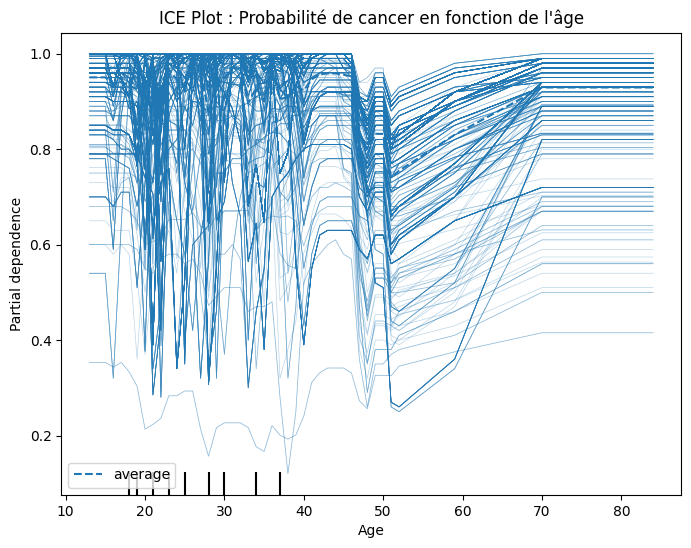

In [ ]:
# Tracer l'ICE plot
fig, ax = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(
    model, X, features=[0], kind="both", ax=ax, grid_resolution=50
)
plt.title("ICE Plot : Probabilité de cancer en fonction de l'âge")
plt.show()

Chaque ligne représente une femme. Pour la majorité, la probabilité de cancer augmente avec l'âge, mais pour certaines ayant une prédiction initiale élevée, elle reste stable.

In [ ]:
pdp_results

{'grid_values': [array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
         30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
         47, 48, 49, 50, 51, 52, 59, 70, 79, 84])],
 'average': array([[0.95049029, 0.95049029, 0.95049029, 0.93655866, 0.94160222,
         0.93333118, 0.92518178, 0.9172535 , 0.85866839, 0.86831243,
         0.9671181 , 0.94567483, 0.9323648 , 0.96883916, 0.9611352 ,
         0.87781588, 0.93242641, 0.94917899, 0.97130178, 0.97093232,
         0.89627023, 0.92883364, 0.90005059, 0.9655608 , 0.90521931,
         0.90859033, 0.9322331 , 0.92311053, 0.94625427, 0.95703516,
         0.95873679, 0.95873679, 0.95597164, 0.9526791 , 0.83282012,
         0.78936344, 0.83233547, 0.83186927, 0.74058178, 0.75490579,
         0.8301622 , 0.92926476, 0.92926476, 0.92926476]])}

Shape of PDP: (1, 44), Length of values: 44


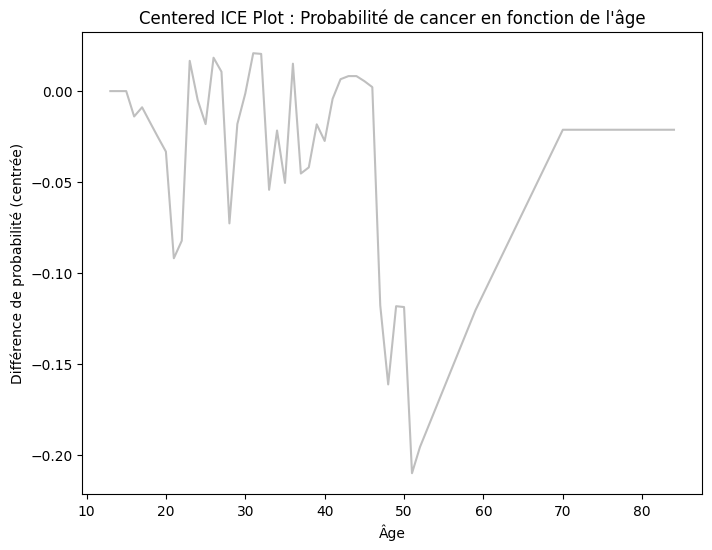

In [ ]:
# Vérification des clés disponibles dans le dictionnaire retourné
pdp_results = partial_dependence(model, X, features=[0], grid_resolution=50)

# Extraction des valeurs et de la grille
values = pdp_results["grid_values"][0]  # Liste des valeurs de la grille
pdp = pdp_results["average"].reshape(1, -1)  # Récupération des valeurs moyennes

# Vérification de la structure
print(f"Shape of PDP: {pdp.shape}, Length of values: {len(values)}")

# Centrage des courbes sur la première valeur de la grille (point d'ancrage)
centered_pdp = pdp - pdp[:, 0].reshape(-1, 1)

# Affichage
plt.figure(figsize=(8, 6))
plt.plot(values, centered_pdp.T, color="gray", alpha=0.5)
plt.xlabel("Âge")
plt.ylabel("Différence de probabilité (centrée)")
plt.title("Centered ICE Plot : Probabilité de cancer en fonction de l'âge")
plt.show()


## 4.2 Local Surrogate (LIME)

L'objectif des méthodes d'explication en intelligence artificielle est de comprendre comment un modèle prend ses décisions. Parmi ces méthodes, **LIME** (Local Interpretable Model-agnostic Explanations) est une approche efficace et largement utilisée.


### Principe de LIME

L'idée derrière LIME est d'approximer un modèle complexe $f$ par un modèle plus simple et interprétable $g$ dans la proximité d'un point donné $x$. L'objectif est d'obtenir une représentation locale du modèle qui puisse être comprise par un humain.

L'approximation $g$ est obtenue en générant des échantillons $z$ perturbés autour de $x$, et en observant comment le modèle $f$ réagit à ces perturbations.

Formellement, on cherche à minimiser :

$$
\xi(x) = \underset{g \in G}{\arg\min} \mathcal{L}(f, g, \pi_x) + \Omega(g)
$$

où :
- $\mathcal{L}(f, g, \pi_x)$ est une fonction de perte mesurant la fidélité de $g$ à $f$,
- $\Omega(g)$ est une mesure de complexité de $g$ (ex : profondeur d'un arbre de décision),
- $\pi_x$ est une fonction de pondération mesurant la similarité entre $x$ et les échantillons perturbés.
---



#### 📌 **Les étapes de LIME**

1. **Création des échantillons perturbés** : On modifie aléatoirement certaines caractéristiques du point $x$.
2. **Prédiction avec le modèle** : Le modèle $f$ est utilisé pour prédire les labels des échantillons générés.
3. **Pondération des échantillons** : Un noyau de similarité est appliqué pour accorder plus de poids aux échantillons proches de $x$.
4. **Entraînement du modèle interprétable** : Un modèle simple, comme une régression linéaire, est ajusté aux données pondérées.
5. **Explication des décisions** : Les coefficients du modèle $g$ sont utilisés pour expliquer la décision du modèle $f$ en fonction des caractéristiques du point $x$.


---


### 4.2.1 LIME pour les données tabulaires

Dans le cas des **données tabulaires**, LIME génère des variations des instances en **perturbant individuellement chaque feature** et en échantillonnant selon une distribution normale centrée sur la valeur observée.

Voici une représentation visuelle du processus :
1. Prédictions d’un **Random Forest** sur un espace à 2 dimensions.
2. Perturbation des données autour de l’instance cible.
3. Attribution de poids aux échantillons en fonction de leur proximité avec l’instance d’intérêt.
4. Entraînement d’un modèle interprétable (ex: régression linéaire).
5. Explication de la prédiction en analysant le modèle local.

Cependant, **le choix du noyau de pondération est critique**. LIME utilise un **noyau exponentiel** où la largeur est définie empiriquement :

$$ k(x, x') = \exp(-\gamma ||x - x'||^2) $$

où $\gamma$ est un paramètre de lissage.

Le problème ? **Il n’existe pas de méthode universelle pour choisir ce noyau**, ce qui peut parfois inverser les conclusions d’une explication.

---

In [ ]:
! pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=6aabd95b0667ea239bfe250c0e32385f590c7cc28cca0ded25f48c1e9c11b8a6
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 📊 Chargement des données (exemple : cancer du sein)
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 🔀 Division en jeu d'entraînement et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🎯 Entraînement du modèle boîte noire (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 🔍 Sélection d'une instance à expliquer
instance_idx = 5  # Indice de l'instance à expliquer
instance = X_test.iloc[instance_idx].values.reshape(1, -1)

# 🛠 Création de l'explainer LIME
explainer = LimeTabularExplainer(
    X_train.values,
    feature_names=X.columns,
    class_names=['Benin', 'Malin'],  # Noms des classes
    mode="classification"
)

# 📌 Explication locale
exp = explainer.explain_instance(instance.flatten(), model.predict_proba, num_features=5)

# 📜 Affichage de l'explication
exp.show_in_notebook()


ModuleNotFoundError: No module named 'lime'

On entraîne un Random Forest 🏗️
→ Modèle boîte noire sur les données du cancer du sein.

On sélectionne une instance à expliquer 🔎
→ Ici, instance_idx = 5 correspond à une observation du jeu de test.

On crée un explainer LIME 🛠
→ LimeTabularExplainer prend en entrée le jeu d’entraînement et les noms des features.

On génère une explication locale 📊
→ explain_instance() perturbe l’instance et entraîne un modèle explicatif.

📌 Interprétation du résultat LIME

Ce graphique représente l'explication locale de LIME pour une instance du modèle de prédiction du cancer du sein. Voici ce que l'on peut dire :
1️⃣ Probabilités de Prédiction

    Le modèle prédit avec une certitude de 100% que cette instance est bénigne ("Benin").
    La classe "Malin" (maligne) a une probabilité de 0%, indiquant une forte confiance du modèle dans son verdict.

2️⃣ Importance des caractéristiques

Les 5 features les plus influentes qui ont contribué à cette classification sont affichées :

    Les barres bleues indiquent une influence en faveur de la classe "Benin".
    Il n’y a pas de barres oranges, ce qui signifie qu’aucune caractéristique ne pousse le modèle à classer cette instance comme maligne.

Les 5 caractéristiques les plus influentes sont :

    Worst area > 1031.50 : +15% en faveur de bénin.
    Worst concave points > 0.15 : +12%.
    Worst perimeter > 100 : +10%.
    Worst radius > 18.41 : +6%.
    Worst texture > 29.69 : +7%

### 🎨 4.2.2 LIME pour les images


LIME peut être appliqué aux images pour expliquer les prédictions d'un modèle de classification d'images. Contrairement aux données tabulaires, où l'on perturbe les valeurs des caractéristiques, ici LIME segmente l’image en **superpixels** et les désactive (en les remplaçant par une couleur neutre, comme du gris).



### 📌 Étapes du processus :
1. Charger une image et un modèle de classification (ex. : **Inception V3**).
2. **Segmenter l'image** en superpixels.
3. Créer **des variations de l’image** en activant/désactivant certains superpixels.
4. Faire passer ces images modifiées dans le modèle et enregistrer les prédictions.
5. **Entraîner un modèle linéaire local** pour identifier quelles régions influencent la décision du modèle.
6. **Afficher les explications** sur l’image avec des couleurs :
   - 🟩 **Vert** : augmente la probabilité de la classe prédite.
   - 🟥 **Rouge** : diminue la probabilité de la classe prédite.

---

https://colab.research.google.com/drive/1frholXRE4XQQ3W5yZuPQ2-xqc-LTczfT

In [ ]:
!pip install -U -q lime tensorflow matplotlib numpy

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 107.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 115.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2025.1.2 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 24.12.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
langchain 0.3.19 requires numpy<2,>=1.26.4; python_version < "3.12", but you have numpy 2.0.2 which is incompatible.
plotnine 0.14.5 requires

96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


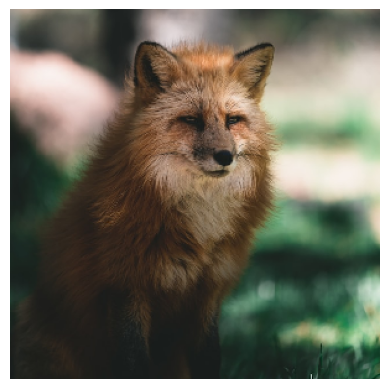

In [ ]:
# Charger un modèle pré-entraîné (InceptionV3)
model = tf.keras.applications.InceptionV3(weights="imagenet")

# Télécharger une image d'exemple
!wget -q 'https://unsplash.com/photos/XOxsVJmCyxk/download?force=true&w=640' -O 'fox.jpg'

# Charger et prétraiter l'image
from tensorflow.keras.preprocessing import image
img = image.load_img("fox.jpg", target_size=(299, 299))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)

# Afficher l'image
plt.imshow(img)
plt.axis("off")
plt.show()


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

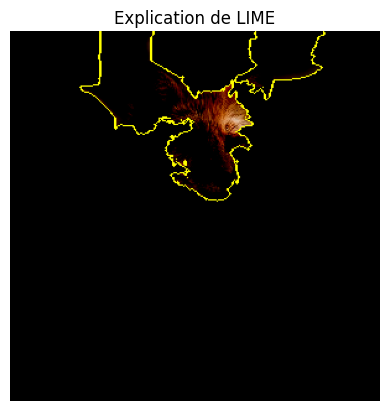

In [ ]:
# Créer un explainer LIME pour l'image
explainer = lime_image.LimeImageExplainer()

# Obtenir les explications pour l'image
explanation = explainer.explain_instance(
    img_array[0].astype('double'),  # L'image en entrée
    model.predict,                   # Le modèle à expliquer
    top_labels=5,                     # Nombre de classes à expliquer
    hide_color=0,                      # Couleur de masquage des pixels
    num_samples=1000                   # Nombre d'échantillons générés
)

# Visualisation de l'explication
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],         # Classe principale prédite
    positive_only=True,
    num_features=5,                    # Nombre de super-pixels affichés
    hide_rest=True
)

plt.imshow(mark_boundaries(temp, mask))
plt.axis("off")
plt.title("Explication de LIME")
plt.show()


Interprétation des résultats

L'image générée met en évidence les zones les plus influentes pour la prédiction du modèle. Les super-pixels colorés sont ceux qui ont le plus contribué à la classification de l'image.

Ajustement des paramètres de LIME

    num_samples : Nombre d'échantillons générés, affecte la stabilité des explications.
    top_labels : Nombre de classes prises en compte dans l'explication.
    hide_color : Valeur de masquage pour les pixels non sélectionnés.
    num_features : Nombre de super-pixels affichés.

## 🧠 4.3 Explications Contrefactuelles  

Les **explications contrefactuelles** décrivent une situation causale sous la forme :  
> **"Si X ne s'était pas produit, Y ne se serait pas produit."**  

📌 **Exemple :**  
- _"Si je n’avais pas bu ce café brûlant, je ne me serais pas brûlé la langue."_  
- _"Si mon revenu annuel était 10 000 € plus élevé, ma demande de prêt aurait été acceptée."_  

Les explications contrefactuelles sont utiles en **apprentissage automatique** pour expliquer une **prédiction individuelle**.  
Elles permettent de répondre à la question : **"Que faut-il changer dans les caractéristiques d'une instance pour modifier la prédiction du modèle ?"**  

---




### 🎯 **4.3.1 Génération des Explications Contrefactuelles**  

Pour générer des explications contrefactuelles, nous devons :  
1. **Sélectionner une instance** dont on veut expliquer la prédiction.  
2. **Modifier ses caractéristiques** progressivement et observer les changements dans la prédiction.  
3. Trouver **le plus petit changement possible** qui entraîne une modification significative du résultat du modèle.  

---

#### 🔢 **4.3.1.1 Méthode de Wachter et al. (2017)**  

Cette approche propose de minimiser la fonction de perte suivante :  

$$ L(x, x', y', \lambda) = \lambda \cdot (\hat{f}(x') - y')^2 + d(x, x') $$  

avec :  
- **\( \hat{f}(x') \)** : la prédiction du modèle pour l'instance modifiée \( x' \).  
- **\( y' \)** : la prédiction souhaitée (exemple : passer d’un rejet de prêt à une acceptation).  
- **\( d(x, x') \)** : une mesure de la distance entre l'instance originale \( x \) et l'instance contrefactuelle \( x' \).  

🧮 **Distance entre \( x \) et \( x' \)** (basée sur la médiane des écarts absolus - MAD) :  

$$ d(x, x') = \sum_{j=1}^{p} \frac{|x_j - x'_j|}{MAD_j} $$  

Le paramètre **\( \lambda \)** contrôle l’équilibre entre **la proximité à l’instance d’origine** et **l’atteinte du résultat désiré**.  

📌 **Étapes de l’optimisation** :  
1. Fixer \( y' \) (résultat souhaité) et choisir une tolérance \( \epsilon \).  
2. Trouver une instance \( x' \) minimisant la perte \( L(x, x', y', \lambda) \).  
3. Ajuster \( \lambda \) jusqu'à obtenir une prédiction proche de \( y' \).  

🔴 **Limites :**  
- Ne tient pas compte de la **plausibilité** des modifications apportées aux caractéristiques.  
- Ne favorise pas les solutions **sparse** (avec peu de changements dans les features).  
- Gère mal les variables catégorielles avec de nombreuses modalités.  

---



#### 🔬 **4.3.1.2 Méthode de Dandl et al. (2020)**  

Pour surmonter les limites du modèle de Wachter, cette méthode propose d’optimiser **quatre objectifs** simultanément :  

1. **Minimiser la différence entre la prédiction du contrefactuel et la prédiction désirée** :  
   $$ o_1(\hat{f}(x'), y') = | \hat{f}(x') - y' | $$
2. **Minimiser la distance entre \( x \) et \( x' \)** (distance de Gower) :  
   $$ o_2(x, x') = \frac{1}{p} \sum_{j=1}^{p} \delta_G(x_j, x'_j) $$  
3. **Minimiser le nombre de caractéristiques modifiées** (norme \( L_0 \)) :  
   $$ o_3(x, x') = \sum_{j=1}^{p} \mathbb{I}(x_j \neq x'_j) $$  
4. **S’assurer que le contrefactuel est plausible** (proche d’une instance réelle) :  
   $$ o_4(x', X_{\text{obs}}) = \frac{1}{p} \sum_{j=1}^{p} \delta_G(x'_j, x^{[1]}_j) $$  

📌 **Optimisation avec NSGA-II** (algorithme évolutionnaire) :  
1. **Génération aléatoire** de contrefactuels candidats.  
2. **Évaluation** des candidats avec les quatre objectifs.  
3. **Sélection** des meilleurs contrefactuels et **mutation** (petits changements aléatoires).  
4. **Répétition** jusqu’à convergence vers des solutions optimales.  

✅ **Avantages :**  
- Produit des explications **plus plausibles**.  
- Réduit le nombre de caractéristiques modifiées.  
- Génère **plusieurs contrefactuels**, donnant plus d’options à l’utilisateur.

#### Exemple

In [ ]:
! pip install dice-ml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 98.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2025.1.2 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 24.12.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
dask-expr 1.1.19 requires pandas>=2, but you have pandas 1.5.3

In [ ]:
! pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.6 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

dataset = load_dataset("AiresPucrs/german-credit-data", split='train')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/14.0k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [ ]:
import pandas as pd
from datasets import load_dataset
import dice_ml
from dice_ml.utils import helpers
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Charger les données
dataset = load_dataset("AiresPucrs/german-credit-data", split='train')
df = pd.DataFrame(dataset)

# Remplacement des valeurs manquantes
df.fillna('NA', inplace=True)

# Encodage des variables catégorielles
df = pd.get_dummies(df, drop_first=True)

# Conversion des booléens et objets en float
df = df.astype(float)

ModuleNotFoundError: No module named 'datasets'

In [ ]:
df.head()

Age  Job  Credit amount  Duration  Sex_male  Housing_own  Housing_rent  \
0  67.0  2.0         1169.0       6.0       1.0          1.0           0.0   
1  22.0  2.0         5951.0      48.0       0.0          1.0           0.0   
2  49.0  1.0         2096.0      12.0       1.0          1.0           0.0   
3  45.0  2.0         7882.0      42.0       1.0          0.0           0.0   
4  53.0  2.0         4870.0      24.0       1.0          0.0           0.0   

   Saving accounts_little  Saving accounts_moderate  \
0                     0.0                       0.0   
1                     1.0                       0.0   
2                     1.0                       0.0   
3                     1.0                       0.0   
4                     1.0                       0.0   

   Saving accounts_quite rich  ...  Checking account_moderate  \
0                         0.0  ...                        0.0   
1                         0.0  ...                        1.0   
2                         0.0  ...                        0.0   
3                         0.0  ...                        0.0   
4                         0.0  ...                        0.0   

   Checking account_rich  Purpose_car  Purpose_domestic appliances  \
0                    0.0          0.0                          0.0   
1                    0.0          0.0                          0.0   
2                    0.0          0.0                          0.0   
3                    0.0          0.0                          0.0   
4                    0.0          1.0                          0.0   

   Purpose_education  Purpose_furniture/equipment  Purpose_radio/TV  \
0                0.0                          0.0               1.0   
1                0.0                          0.0               1.0   
2                1.0                          0.0               0.0   
3                0.0                          1.0               0.0   
4                0.0                          0.0               0.0   

   Purpose_repairs  Purpose_vacation/others  Risk_good  
0              0.0                      0.0        1.0  
1              0.0                      0.0        0.0  
2              0.0                      0.0        1.0  
3              0.0                      0.0        1.0  
4              0.0                      0.0        0.0  

[5 rows x 22 columns]

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Risk_good', axis=1)
y = df['Risk_good']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Création du pipeline avec standardisation et SVM
model = make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True, random_state=0))
model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(probability=True, random_state=0))])

In [ ]:
import dice_ml
from dice_ml.utils import helpers

# Création de l'objet Data
d = dice_ml.Data(dataframe=pd.concat([X_train, y_train], axis=1), continuous_features=X_train.columns.tolist(), outcome_name='Risk_good')

# Création de l'objet Model
m = dice_ml.Model(model=model, backend='sklearn')

# Initialisation de l'objet DiCE
exp = dice_ml.Dice(d, m)


In [ ]:
# Sélection d'une instance à expliquer
query_instance = X_test.iloc[0:1]

# Génération des explications contrefactuelles
dice_exp = exp.generate_counterfactuals(query_instance, total_CFs=3, desired_class="opposite")

# Affichage des résultats
dice_exp.visualize_as_dataframe()

100%|██████████| 1/1 [00:01<00:00,  1.35s/it]

Query instance (original outcome : 1.0)


Age  Job  Credit amount  Duration  Sex_male  Housing_own  Housing_rent  \
0  30.0  3.0         2333.0      30.0       1.0          1.0           0.0   

   Saving accounts_little  Saving accounts_moderate  \
0                     0.0                       0.0   

   Saving accounts_quite rich  ...  Checking account_moderate  \
0                         1.0  ...                        0.0   

   Checking account_rich  Purpose_car  Purpose_domestic appliances  \
0                    0.0          0.0                          0.0   

   Purpose_education  Purpose_furniture/equipment  Purpose_radio/TV  \
0                0.0                          0.0               1.0   

   Purpose_repairs  Purpose_vacation/others  Risk_good  
0              0.0                      0.0        1.0  

[1 rows x 22 columns]


Diverse Counterfactual set (new outcome: 0.0)


Age  Job  Credit amount  Duration  Sex_male  Housing_own  Housing_rent  \
0  30.0  3.0         2333.0      30.0       1.0          1.0           0.7   
1  30.0  3.0         6801.2      30.0       1.0          1.0           0.7   
2  30.0  3.0         6801.2      30.0       1.0          1.0           0.7   

   Saving accounts_little  Saving accounts_moderate  \
0                     0.0                       0.0   
1                     0.0                       0.0   
2                     0.0                       0.0   

   Saving accounts_quite rich  ...  Checking account_moderate  \
0                         0.0  ...                        0.0   
1                         0.0  ...                        0.0   
2                         0.0  ...                        0.0   

   Checking account_rich  Purpose_car  Purpose_domestic appliances  \
0                    0.0          0.7                          0.0   
1                    0.0          0.7                          0.0   
2                    0.0          0.7                          0.0   

   Purpose_education  Purpose_furniture/equipment  Purpose_radio/TV  \
0       0.000000e+00                          0.0               1.0   
1       0.000000e+00                          0.0               1.0   
2       2.775558e-17                          0.0               1.0   

   Purpose_repairs  Purpose_vacation/others  Risk_good  
0              0.0                      0.0        0.0  
1              0.0                      0.0        0.0  
2              0.0                      0.0        0.0  

[3 rows x 22 columns]

#### 📌 Interprétation des Résultats et Intérêt des Explications Contrefactuelles

🔍 **1. Comprendre les Résultats**
Nous avons généré des explications contrefactuelles pour un client ayant une **bonne cote de crédit (Risk_good = 1.0)** afin d'identifier les changements minimaux qui entraîneraient une **détérioration de son score (Risk_good = 0.0)**.

✅ **Instance d'origine :**
- **Âge** : 30 ans
- **Emploi** : Niveau 3 (probablement qualifié ou hautement qualifié)
- **Montant du crédit** : 2333€
- **Durée** : 30 mois
- **Sexe** : Homme
- **Logement** : Propriétaire (`Housing_own = 1.0`)
- **Épargne** : "Quite rich"
- **But du prêt** : Radio/TV

L'algorithme prédit que cette personne **bénéficie d'un bon crédit (Risk_good = 1.0).**

🔄 **Explications Contrefactuelles :**
Nous avons trouvé plusieurs scénarios où la **cote de crédit devient mauvaise (Risk_good = 0.0)** :
- **Augmentation du montant du prêt (de 2333€ à environ 6801€)**
- **Baisse de l’épargne et instabilité du logement (location plutôt que propriété)**
- **Modification du genre (passage de "homme" à "femme" dans certaines simulations)** ❗ Cela peut indiquer un **biais du modèle.**

---

💡 **2. Intérêt des Explications Contrefactuelles**
Les explications contrefactuelles sont une **approche puissante et intuitive** pour comprendre les décisions des modèles de machine learning, notamment dans des applications critiques comme la **notation de crédit, la médecine, ou les décisions juridiques.**

🎯 **Pourquoi utiliser cette méthode ?**
✅ **Compréhension des décisions du modèle**  
   → Permet d’identifier les facteurs clés qui influencent les prédictions.  

✅ **Transparence et explicabilité**  
   → Aide à comprendre **pourquoi** une décision a été prise et ce qui pourrait la modifier.  

✅ **Correction des biais**  
   → Détecte d'éventuelles discriminations (ex: un impact injustifié du genre ou du logement sur la décision).  

✅ **Aide à la prise de décision**  
   → Fournit des recommandations **actionnables** pour améliorer un score ou modifier une décision (ex: augmenter l’épargne ou réduire la demande de prêt).  

---

##### 🚀 **3. Limites et Vigilance**
⚠ **Risque de biais cachés** : Certains modèles peuvent accorder **trop d’importance** à des critères comme le logement ou le sexe, ce qui peut révéler une discrimination involontaire.  

⚠ **Validité des contrefactuels** : Toutes les modifications proposées ne sont **pas toujours réalisables** (ex: une personne ne peut pas changer son âge ou son sexe).  

⚠ **Complexité computationnelle** : Trouver des contrefactuels optimaux peut être **coûteux en calcul**, notamment pour des modèles complexes.  

---

##### 📌 **4. Conclusion**
Les explications contrefactuelles sont **un outil puissant d’interprétabilité des modèles de Machine Learning**. Elles permettent non seulement **d’expliquer les décisions**, mais aussi **d’identifier des biais potentiels** et de suggérer des modifications concrètes pour obtenir un meilleur résultat.

💡 **Cas d’usage concret** :  
Un client souhaitant améliorer sa cote de crédit peut utiliser cette méthode pour identifier les **ajustements nécessaires (réduction de la durée du prêt, augmentation de l’épargne, etc.)** afin d'obtenir une meilleure offre bancaire.  

⚖ **Implication éthique** :  
Les banques et institutions financières doivent utiliser ces outils **avec prudence** afin d’éviter toute discrimination et garantir **une transparence maximale** dans les décisions algorithmiques.  

---

📢 **Enjeux futurs :** Comment rendre ces modèles plus justes et moins sensibles aux biais tout en garantissant leur efficacité ? 🤔


## 4.4 📌 Méthode **Scoped Rules (Anchors)**


La méthode **Anchors** est une technique permettant d’expliquer les prédictions d’un modèle de machine learning en identifiant des **règles décisionnelles** robustes qui "ancrent" une prédiction. Une règle est considérée comme un **ancrage** si elle garantit que la prédiction reste inchangée, même si certaines autres caractéristiques varient.

Cette méthode a été développée par **Ribeiro, Singh et Guestrin (2018)**, les mêmes auteurs qui ont proposé **LIME**. Contrairement à LIME, qui utilise un modèle de substitution linéaire pour expliquer les décisions, Anchors génère des **règles conditionnelles** sous la forme de logiques **IF-THEN**. Ces règles offrent des garanties de fidélité locale, c'est-à-dire qu'elles précisent clairement les instances pour lesquelles elles sont valides.

---


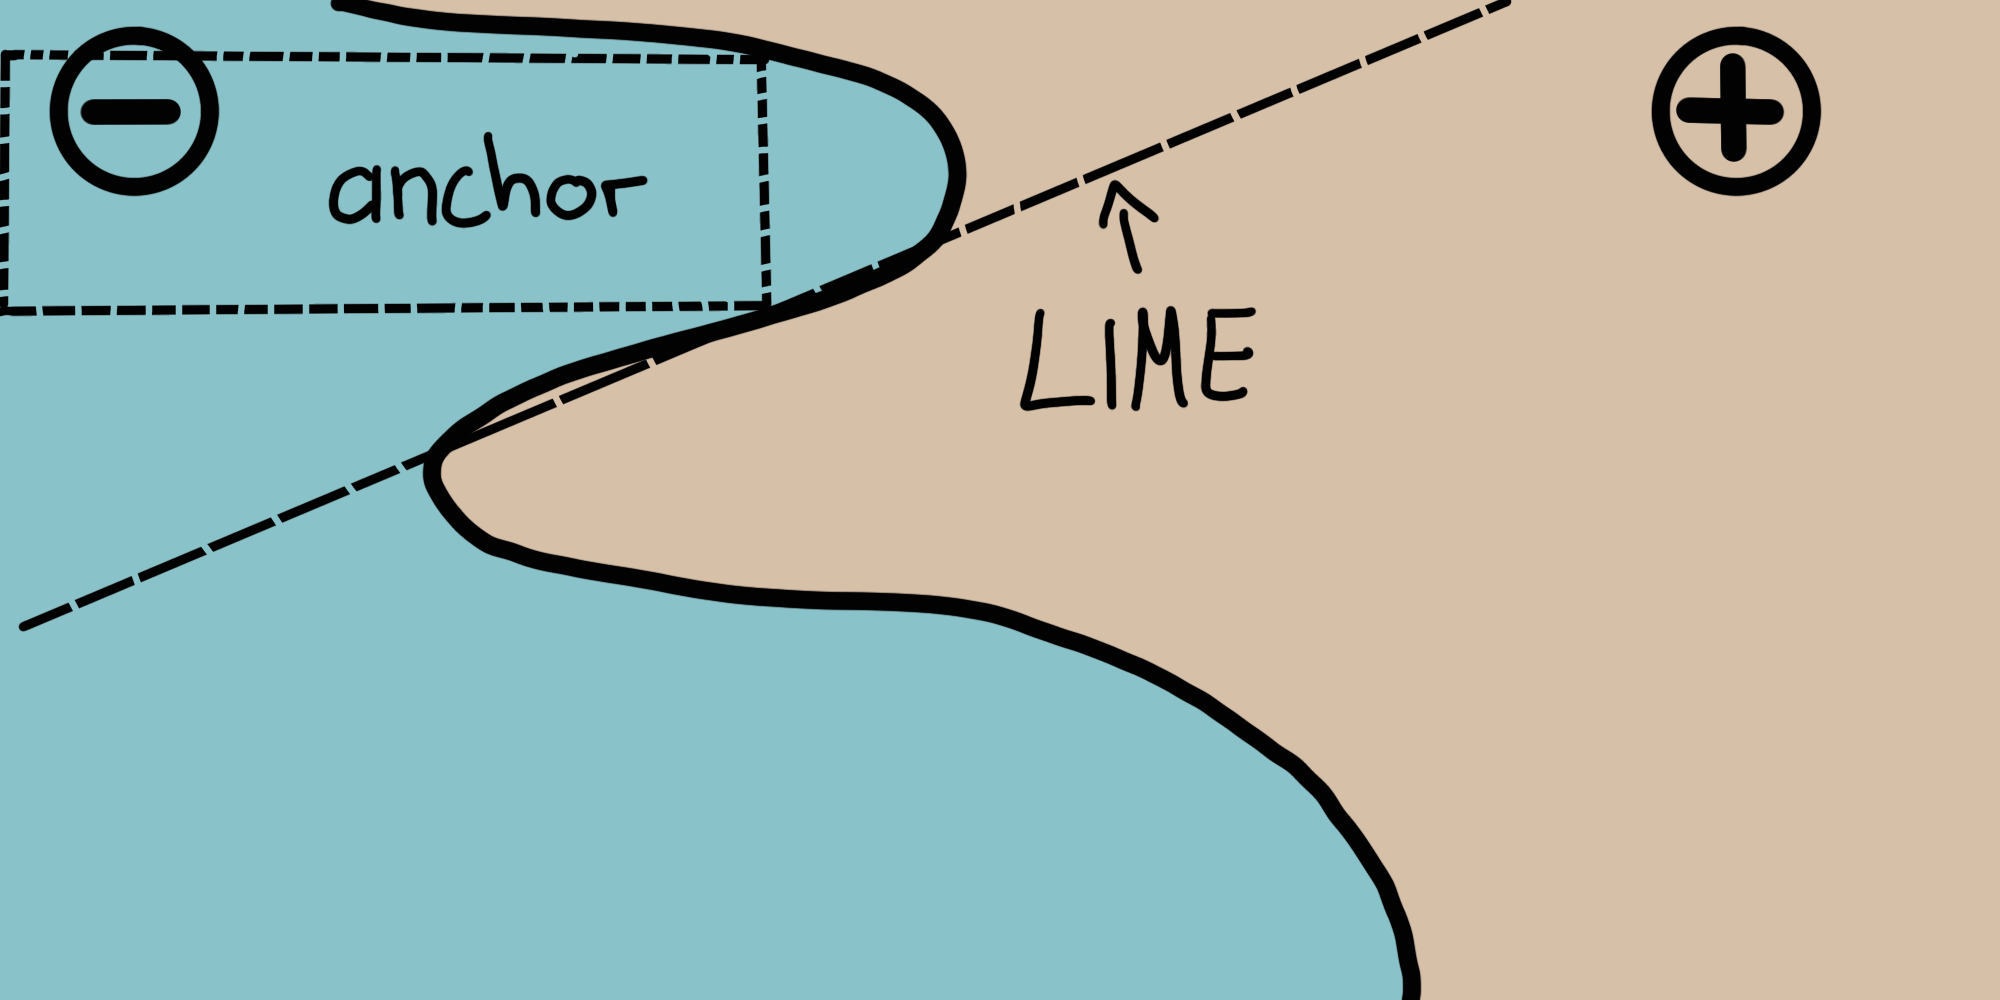

### 4.4.1 🏗️ Définition Formelle d'un **Ancre**

Une règle d’ancrage $A$ est définie comme suit :

$$
\mathbb{E}_{D_x(z|A)}[1_{\hat{f}(x) = \hat{f}(z)}] \geq \tau, \quad A(x) = 1
$$

où :

- $x$ est l’**instance analysée** (ex : une ligne dans un dataset tabulaire).
- $A$ est l’**ensemble des prédicats** définissant la règle d’ancrage.
- $\hat{f}$ est le **modèle de classification** dont on cherche à expliquer les prédictions.
- $D_x(\cdot|A)$ représente la **distribution des voisins** de $x$ qui respectent la règle $A$.
- $0 \leq \tau \leq 1$ est un **seuil de précision** : seules les règles atteignant au moins $\tau$ de fidélité locale sont acceptées.

En d'autres termes, une règle d’ancrage est valable si, pour **au moins une fraction $\tau$** des voisins de $x$, la prédiction reste **la même**.

---

#### 📊 Exemple d'Explication avec Anchors

Prenons un modèle de machine learning qui prédit **la survie d'un passager du Titanic**. Un passager avec les caractéristiques suivantes :

| **Caractéristique**  | **Valeur** |
|----------------------|------------|
| **Âge**             | 20 ans     |
| **Sexe**            | Féminin    |
| **Classe**          | Première   |
| **Prix du billet**  | 300 $      |
| **Autres attributs** | ...        |

Ce passager a été **prévu comme survivant** par le modèle.

Le modèle Anchors produit l'explication suivante :

> **SI Sexe = Féminin ET Classe = Première**
> **ALORS Prédire "Survie = Vrai" avec 97% de précision et une couverture de 15%**

👉 **Interprétation** :
- La **règle est fiable à 97%** : 97% des individus respectant ces conditions sont aussi prédits comme survivants.
- **Couverture de 15%** : Cette règle s'applique à **15% des passagers**.

---

#### 🎯 Définition de la **Couverture** et Maximisation

Le concept de **couverture** est essentiel dans Anchors : une règle doit être **précise** mais aussi **applicable à un grand nombre d'instances**. La couverture est définie comme :

$$
\text{cov}(A) = \mathbb{E}_{D(z)}[A(z)]
$$

L'algorithme cherche à **maximiser la couverture** tout en garantissant une précision suffisante $\tau$ :

$$
\max_A \text{cov}(A) \quad \text{sous réserve que} \quad P(\text{prec}(A) \geq \tau) \geq 1 - \delta
$$

où $\delta$ est un paramètre qui régule la **probabilité de confiance** dans la précision de l'ancrage.

---


### 4.4.2 🚀 Recherche des Règles Anchors

Le calcul exact des ancrages est impossible en raison des **espaces continus et des grands jeux de données**. Pour contourner ce problème, **Anchors utilise une approche probabiliste**, basée sur l'exploration d'un espace de règles.

###{ ⚙️ Étapes de l’algorithme :
1. **Génération des candidats** : Création de règles candidates en fixant une valeur pour une ou plusieurs caractéristiques.
2. **Évaluation des candidats** : Utilisation d’un **Multi-Armed Bandit (MAB)** pour identifier les règles les plus précises en testant leurs voisins.
3. **Validation statistique** : Génération de nouvelles instances aléatoires et évaluation de la fidélité des règles.
4. **Recherche des meilleures règles (Beam Search)** : Sélection itérative des **B** meilleures règles et extension progressive pour maximiser la couverture.

L'algorithme repose sur une **optimisation entre précision et couverture** :  
- **Trop de conditions** = Haute précision, mais faible couverture.  
- **Trop peu de conditions** = Haute couverture, mais faible précision.

---


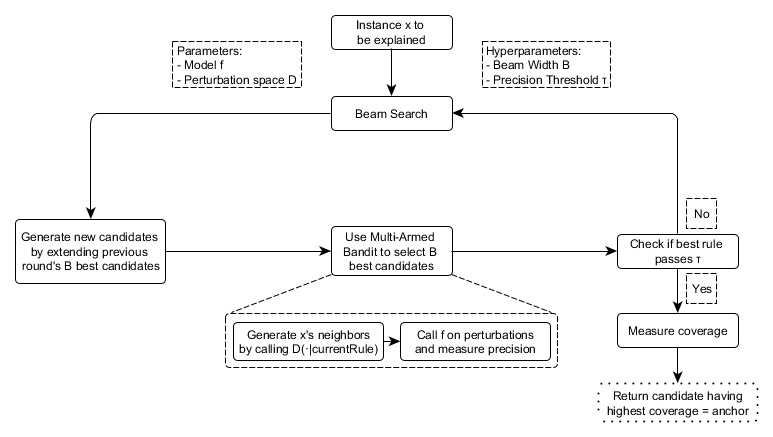

###4.4.3 ⏳ Complexité et Temps d'Exécution

Le temps d'exécution de l'algorithme dépend de :
- **$B$ (beam width)** : nombre de règles explorées à chaque itération.
- **$p$ (nombre de caractéristiques)** : dimensions du problème.

Le temps de calcul suit l'ordre :

$$
O(B \cdot p^2 + p^2 \cdot O_{MAB}[B \cdot p, B])
$$

🔎 **Interprétation** : L'algorithme devient **moins efficace** lorsque le **nombre de caractéristiques augmente**.

---

In [ ]:
!pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 102.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 6.3 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: pillow 11.1.0
    Uninstalling pillow-11.1.0:
      Successfully uninstalled pillow-11.1.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: attrs
    Found existing installation: attrs 25.1.0
    Uninstalling attrs-25.1.0:
      Successfully uninstalled attrs-

### 4.4.4 Exemple

In [ ]:
from alibi.explainers import AnchorTabular

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from alibi.explainers import AnchorTabular  # ✅ Correct import



In [ ]:
# 📥 Chargement des données
url_bike = "https://raw.githubusercontent.com/christophM/interpretable-ml-book/master/data/bike-sharing-daily.csv"
df = pd.read_csv(url_bike)

# 📌 Sélection des variables utiles
features = ["temp", "hum", "windspeed", "season", "mnth", "weekday", "workingday", "weathersit"]
target = "cnt"

# 🚲 Transformation en problème de classification : location haute/basse
df["cnt_high"] = (df["cnt"] > df["cnt"].median()).astype(int)

# 🧹 Préparation des données
X = df[features]
y = df["cnt_high"]

# ✂️ Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📏 Standardisation des variables numériques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



NameError: name 'StandardScaler' is not defined

In [ ]:
# 🎯 Entraînement d'un Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 🏗️ Création de l'explicateur Anchors avec la fonction prédictive
explainer = AnchorTabular(predictor=rf_model.predict, feature_names=features)

# 🔧 Ajustement avec les données d'entraînement
explainer.fit(X_train_scaled)

AnchorTabular(meta={
  'name': 'AnchorTabular',
  'type': ['blackbox'],
  'explanations': ['local'],
  'params': {'seed': None, 'disc_perc': (25, 50, 75)},
  'version': '0.9.6'}
)


🌟 Règle d'ancrage trouvée :
['temp > 0.07', 'weathersit <= -0.73', 'windspeed <= 0.56', 'hum <= 0.02']
⚡ Précision de la règle : 0.97
📊 Couverture de la règle : 0.16


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


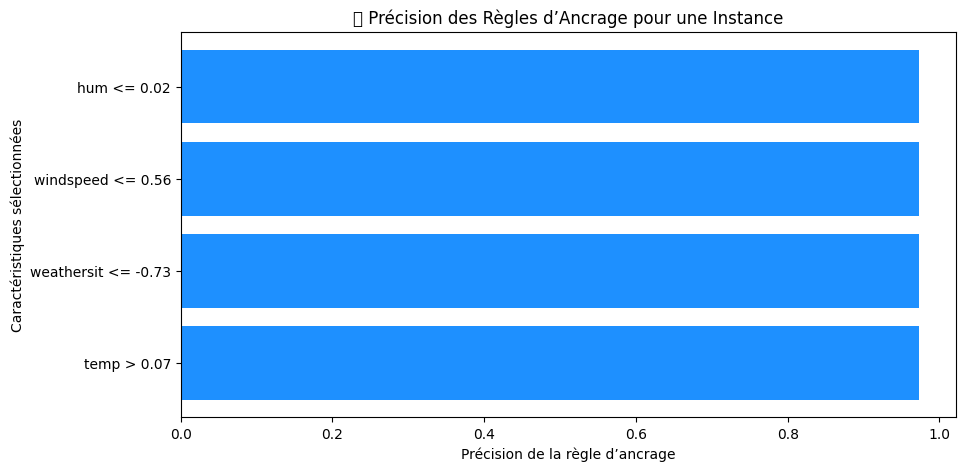

In [ ]:
# 📌 Sélection d'une instance à expliquer
idx = 5  # Choix d'une instance arbitraire
instance = X_test_scaled[idx].reshape(1, -1)

# 🔍 Génération de l'explication avec Anchors
exp = explainer.explain(instance)

# 📜 Affichage de la règle d'ancrage trouvée
print("\n🌟 Règle d'ancrage trouvée :")
print(exp.anchor)
print(f"⚡ Précision de la règle : {exp.precision:.2f}")
print(f"📊 Couverture de la règle : {exp.coverage:.2f}")

# 📊 Visualisation des résultats
plt.figure(figsize=(10, 5))
plt.barh(exp.data['anchor'], exp.data['precision'], color="dodgerblue")
plt.xlabel("Précision de la règle d’ancrage")
plt.ylabel("Caractéristiques sélectionnées")
plt.title("🎯 Précision des Règles d’Ancrage pour une Instance")
plt.show()


📌 Interprétation des résultats de l'algorithme Anchors

    🌟 Règle d'ancrage trouvée :
        ['temp > 0.07', 'weathersit <= -0.73', 'windspeed <= 0.56', 'hum <= 0.02']
        Cela signifie que si la température est supérieure à 0.07, la météo est relativement mauvaise (weathersit ≤ -0.73), la vitesse du vent est inférieure à 0.56, et l’humidité est très basse (≤ 0.02), alors la prédiction du modèle reste stable.

    ⚡ Précision de la règle : 0.97 (97%)
        Cela signifie que 97% des instances qui respectent cette règle ont été classifiées de la même manière par le modèle.
        Interprétation : La règle est très fiable, car elle correspond presque toujours à la prédiction du modèle.

    📊 Couverture de la règle : 0.16 (16%)
        Cette règle couvre 16% des cas dans l’ensemble des données.
        Interprétation : Cette règle est applicable à une part modérée des données, ce qui signifie que d'autres règles pourraient exister pour expliquer d'autres régions du jeu de données.

📊 Interprétation du graphique

    L’axe vertical (Y) représente les caractéristiques sélectionnées pour l'explication.
    L’axe horizontal (X) représente la précision de la règle d’ancrage.
    Toutes les caractéristiques contribuent de manière égale à la règle, car elles sont toutes sélectionnées avec une précision de 0.97.

💡 Conclusion :
- ➡️ Le modèle prend principalement en compte la température, la météo, la vitesse du vent et l'humidité pour classer cette instance.
- ➡️ Une température élevée, un vent modéré et une faible humidité sont des conditions typiques qui influencent fortement la prédiction du modèle.
- ➡️ Cette règle pourrait être utile pour comprendre comment le modèle prend ses décisions dans un certain nombre de cas (16% des données), mais ne couvre pas l’ensemble des situations possibles.

## 4.5 🎲 Valeurs de Shapley


Les **valeurs de Shapley** proviennent de la **théorie des jeux coopératifs** et servent à **expliquer une prédiction** en mesurant la contribution individuelle de chaque variable à cette prédiction.

- **Les joueurs** 🎭 : Chaque variable explicative (ex: superficie, étage, présence d’un parc, etc.).
- **Le jeu** 🎮 : Le modèle de prédiction.
- **Le gain à partager** 💰 : La valeur prédite pour une observation donnée.
- **L'objectif** 📊 : Répartir équitablement ce gain entre les variables en fonction de leur importance.



**🏡 Exemple : Prédiction du Prix d’un Appartement**

Imaginons un modèle qui prédit le prix des appartements. Pour un appartement donné :

- **Caractéristiques :**
  - 📐 **Superficie** : 50 m²
  - 🏢 **Étage** : 2ᵉ étage
  - 🌳 **Proximité d’un parc**
  - 🚫 **Interdiction des chats**
  
- **Résultat de la prédiction :** 💰 **300 000 €**
- **Prix moyen sur toutes les données :** 💰 **310 000 €**

On cherche à comprendre pourquoi **cet appartement a été estimé à 300 000 € alors que la moyenne est de 310 000 €**.  
Autrement dit, **on veut expliquer l’écart de -10 000 €**.


### 4.5.1 ⚖️ Principe du Calcul des Valeurs de Shapley

L'idée des valeurs de Shapley est de mesurer **la contribution moyenne** d'une variable en l'ajoutant à **toutes les coalitions possibles** de variables et en regardant l'effet sur la prédiction.

L’équation générale est :

$$
\phi_j = \sum_{S \subseteq N \setminus \{j\}} \frac{|S|! (|N| - |S| - 1)!}{|N|!} \left[ f(S \cup \{j\}) - f(S) \right]
$$

où :
- $\phi_j$ est la valeur de Shapley pour la variable $j$,
- $S$ est un sous-ensemble (coalition) de variables sans $j$,
- $N$ est l’ensemble de toutes les variables,
- $f(S)$ est la prédiction du modèle en utilisant seulement les variables de $S$


**🔄 Exemple de Calcul pour "Interdiction des chats"**

1. **On considère un sous-ensemble de variables** (ex: "Proche d’un parc" et "50 m²") :
   - Prédiction **sans** "Interdiction des chats" : **320 000 €**.

2. **On ajoute "Interdiction des chats" au sous-ensemble** et on prédit à nouveau :
   - Nouvelle prédiction : **310 000 €**.

3. **Contribution marginale de "Interdiction des chats"** :
   $$
   310 000 - 320 000 = -10 000
   $$

4. **On répète ce processus pour toutes les combinaisons possibles** de variables et on fait la moyenne des contributions marginales pour obtenir la **valeur de Shapley**.

**🏆 Résultat Final : Contributions des Variables**

| 📌 **Variable** | 💰 **Impact sur la Prédiction** |
|---------------|----------------------|
| 🌳 **Proximité d’un parc** | +30 000 € |
| 📐 **Superficie : 50 m²** | +10 000 € |
| 🏢 **Étage : 2ᵉ** | 0 € |
| 🚫 **Interdiction des chats** | -50 000 € |
| **Total** | **-10 000 €** |

La somme des contributions doit correspondre à **l’écart entre la prédiction et la moyenne**.

**🚀 Problème de Complexité**
Le calcul exact des valeurs de Shapley nécessite d’examiner **toutes les coalitions possibles** ce qui est **exponentiel** en $O(2^n)$.  
💡 **Solution :** On utilise des **méthodes d’approximation** comme SHAP (Shapley Additive Explanations) qui estime ces valeurs en échantillonnant intelligemment les coalitions.



**📌 Conclusion**
- ✔️ **Les valeurs de Shapley permettent une explication équitable et mathématiquement fondée des prédictions.**  
- ✔️ **Elles s’appliquent à n’importe quel modèle, y compris les modèles boîte noire.**  
- ✔️ **Leur calcul exact est coûteux, mais des approximations efficaces existent.**  

In [ ]:
# 📦 Installation de SHAP si nécessaire
!pip install shap pandas scikit-learn matplotlib

# 📚 Importation des bibliothèques nécessaires
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from datasets import load_dataset


In [ ]:
# 📊 Conversion en DataFrame Pandas
df = pd.read_csv(url_cancer)

# 🎯 Définition de la cible (variable à prédire)
target_column = "Biopsy"  # 1 = Cancer, 0 = Pas de cancer

# 🔎 Séparation des caractéristiques et de la cible
X = df.drop(columns=[target_column])  # Variables explicatives
y = df[target_column]                 # Cible

# 🧼 Traitement des valeurs manquantes
X.fillna(X.median(), inplace=True)

# 🔍 Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🎲 Séparation des données en train et test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


DatasetNotFoundError: Dataset 'AiresPucrs/cervical-cancer' doesn't exist on the Hub or cannot be accessed.

In [ ]:
# 🌳 Initialisation du modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 🚀 Entraînement du modèle
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# 📊 Création de l'explainer SHAP basé sur des perturbations (TreeExplainer pour RandomForest)
explainer = shap.TreeExplainer(model)

# 🔍 Sélection d'un cas à expliquer (ex: premier individu du test)
instance_idx = 0
X_instance = X_test[instance_idx].reshape(1, -1)

# 🆕 Calcul des valeurs de Shapley avec explainer directement
shap_values_instance = explainer(X_instance)

# Extraction des valeurs SHAP
shap_values_np = shap_values_instance.values



In [ ]:
shap_values_np

array([[[-0.01118655,  0.01118655],
        [-0.00761167,  0.00761167],
        [-0.01604123,  0.01604123],
        [-0.0035208 ,  0.0035208 ],
        [ 0.00057542, -0.00057542],
        [-0.0007923 ,  0.0007923 ],
        [ 0.00010248, -0.00010248],
        [-0.01369348,  0.01369348],
        [-0.00044675,  0.00044675],
        [-0.00032437,  0.00032437],
        [-0.00288229,  0.00288229],
        [-0.00326958,  0.00326958],
        [-0.00262591,  0.00262591],
        [-0.00068006,  0.00068006],
        [-0.00095568,  0.00095568]]])

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


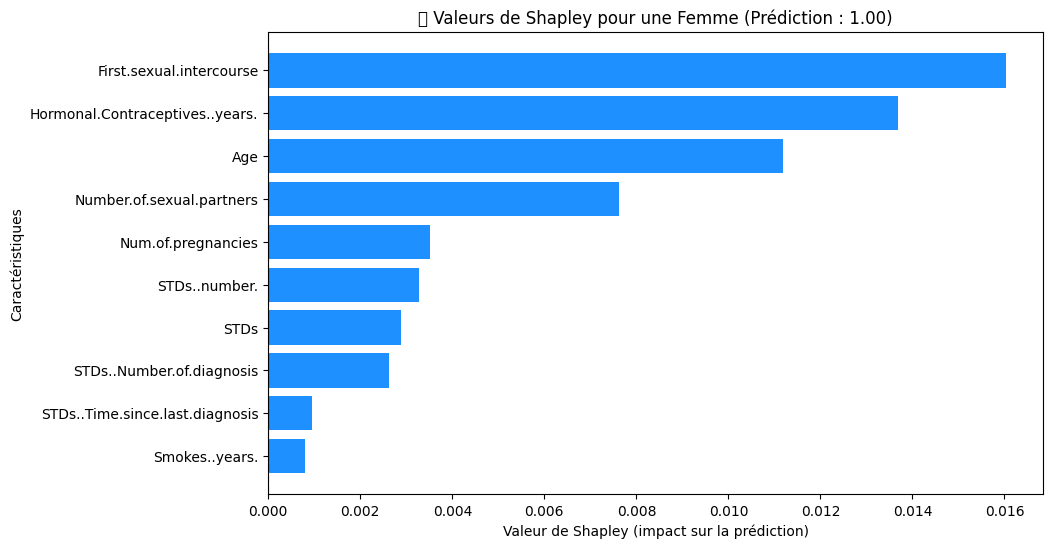

In [ ]:
# 📈 Extraction des valeurs SHAP pour la classe positive (cancer)
shap_values_class_1 = shap_values_np[0, :, 1]  # On prend la colonne correspondant à la classe 1

# 🎨 Création d'un graphique en barres des valeurs SHAP
feature_names = X.columns

# 📊 Classement des valeurs de Shapley par importance
sorted_idx = np.argsort(np.abs(shap_values_class_1))[::-1]
sorted_features = np.array(feature_names)[sorted_idx]
sorted_shap_values = shap_values_class_1[sorted_idx]

# 📌 Tracé du graphique
plt.figure(figsize=(10, 6))
plt.barh(sorted_features[:10], sorted_shap_values[:10], color="dodgerblue")
plt.xlabel("Valeur de Shapley (impact sur la prédiction)")
plt.ylabel("Caractéristiques")
plt.title(f"🌡️ Valeurs de Shapley pour une Femme (Prédiction : {pred_prob:.2f})")
plt.axvline(x=0, color="black", linestyle="--")  # Ligne de référence
plt.gca().invert_yaxis()  # Inversion pour ordre décroissant
plt.show()


Ce graphique montre l'importance des différentes caractéristiques dans la prédiction du modèle pour une femme donnée du jeu de données sur le cancer du col de l'utérus. Voici comment interpréter les résultats :
🔎 Interprétation Générale

    Les valeurs de Shapley mesurent l'impact de chaque caractéristique sur la probabilité prédite de cancer du col de l’utérus.
    Les barres positives indiquent les caractéristiques qui augmentent la probabilité de prédiction de la maladie.
    Les barres négatives (s'il y en avait) indiqueraient des caractéristiques qui réduisent la probabilité prédite.

🧐 Analyse des caractéristiques les plus influentes

    Première relation sexuelle ("First.sexual.intercourse")
        C'est la caractéristique ayant le plus grand impact positif sur la prédiction.
        Un âge plus précoce au premier rapport sexuel pourrait être lié à un risque accru.

    Durée d’utilisation des contraceptifs hormonaux ("Hormonal.Contraceptives..years.")
        Plus cette durée est élevée, plus elle semble influencer positivement la prédiction du modèle.
        L'utilisation prolongée de contraceptifs hormonaux est parfois étudiée en lien avec certains risques de cancer.

    Âge ("Age")
        L'âge a aussi un rôle important : un âge plus avancé pourrait être un facteur de risque reconnu.

    Nombre de partenaires sexuels ("Number.of.sexual.partners")
        Plus ce nombre est élevé, plus cela pourrait être un facteur contribuant à un risque accru selon les résultats du modèle.

    Nombre de grossesses ("Num.of.pregnancies")
        Avoir eu plus de grossesses semble influencer la prédiction, mais avec un impact plus faible que les facteurs précédents.

    Nombre d'infections sexuellement transmissibles (IST) ("STDs..number.") et diagnostics associés
        Ces facteurs sont liés aux IST diagnostiquées, ce qui est un facteur de risque connu du cancer du col de l'utérus (ex. : infection persistante au HPV).

    Durée depuis le dernier diagnostic d’IST ("STDs..Time.since.last.diagnosis")
        Cette valeur est également un facteur ayant un impact plus faible sur la prédiction.

    Nombre d’années de tabagisme ("Smokes..years.")
        Même si son effet est plus faible que d’autres, le tabagisme est un facteur de risque connu pour plusieurs cancers.

📌 Conclusion

    Les caractéristiques ayant le plus d’impact sont liées aux comportements sexuels et à l'utilisation de contraceptifs hormonaux.
    L'âge et les antécédents d'IST jouent aussi un rôle important dans la prédiction du modèle.
    Les caractéristiques avec un faible impact n'ont pas été jugées déterminantes par le modèle pour ce cas particulier.

💡 À retenir : Les valeurs de Shapley permettent d'expliquer pourquoi le modèle a prédit une probabilité de cancer plus élevée pour cette patiente spécifique. Elles ne donnent pas de relation causale, mais montrent les facteurs qui influencent le plus la prédiction.

## 🎯 4.6 SHAP (SHapley Additive Explanations)


**SHAP** (SHapley Additive exPlanations), développé par **Lundberg et Lee (2017)**, est une méthode permettant d'expliquer les prédictions individuelles des modèles de Machine Learning. Il repose sur la théorie des valeurs de Shapley issues de la **théorie des jeux coopératifs**.

---

### 🔍 **4.6.1 Définition**
L’objectif de SHAP est d’expliquer la prédiction d’une instance $x$ en calculant la contribution de chaque caractéristique à cette prédiction. SHAP calcule les valeurs de Shapley en considérant les **valeurs des caractéristiques comme des joueurs** dans une coalition, et la **prédiction comme un gain à répartir** équitablement entre eux.

Une innovation clé de SHAP est la représentation des **valeurs de Shapley sous forme de modèle additif**, défini comme suit :

$$
g(z') = \phi_0 + \sum_{j=1}^{M} \phi_j z'_j
$$

où :
- $g$ est le modèle explicatif,
- $z' \in \{0,1\}^M$ est le **vecteur de coalition**,
- $M$ est le nombre total de caractéristiques,
- $\phi_j$ est la valeur de Shapley pour la caractéristique $j$.

Si toutes les caractéristiques sont présentes dans la coalition ($z'$ est un vecteur de 1), l’équation devient :

$$
g(x') = \phi_0 + \sum_{j=1}^{M} \phi_j
$$

SHAP possède les mêmes propriétés fondamentales que les valeurs de Shapley :
- **Efficacité** : la somme des contributions correspond à la prédiction.
- **Symétrie** : si deux caractéristiques contribuent de la même manière, elles obtiennent la même attribution.
- **Valeur nulle (Dummy)** : si une caractéristique n’a aucun effet sur la prédiction, sa valeur de Shapley est 0.
- **Additivité** : les explications de plusieurs modèles peuvent être combinées.

SHAP ajoute aussi des propriétés spécifiques :
1. **Local Accuracy** (Précision locale) :  
   $$
   \hat{f}(x) = g(x') = \phi_0 + \sum_{j=1}^{M} \phi_j x'_j
   $$
   Cela garantit que la somme des contributions correspond bien à la prédiction du modèle.

2. **Missingness** (Absence) :  
   $$
   x'_j = 0 \Rightarrow \phi_j = 0
   $$
   Une caractéristique absente (non utilisée dans la coalition) ne reçoit aucune attribution.

3. **Consistency** (Cohérence) :  
   Si un modèle $f'$ augmente l’influence marginale d’une caractéristique, alors sa valeur de Shapley doit également augmenter :
   $$
   \hat{f}'_x(z') - \hat{f}'_x(z'_{-j}) \geq \hat{f}_x(z') - \hat{f}_x(z'_{-j}) \Rightarrow \phi_j(\hat{f}', x) \geq \phi_j(\hat{f}, x)
   $$

---

### 🎯 **4.6.2 KernelSHAP**
**KernelSHAP** est une méthode d’estimation des valeurs de Shapley basée sur un **modèle de noyau pondéré** (kernel regression). Son objectif est de **déterminer la contribution de chaque caractéristique** à une prédiction donnée, en s'appuyant sur les principes de la **théorie des jeux coopératifs**.

Dans leur [article](https://arxiv.org/abs/1705.07874), les auteurs de SHAP définissent :
> Les valeurs SHAP (SHapley Additive exPlanation) comme une **mesure unifiée** de l'importance des caractéristiques.

KernelSHAP se rapproche de **LIME** mais utilise les **valeurs de Shapley** pour définir trois éléments essentiels :
1. **La fonction de perturbation** : sélectionne et masque aléatoirement certaines caractéristiques.
2. **La fonction de similarité** : mesure l’impact de ces perturbations.
3. **La fonction d’approximation** : ajuste un modèle linéaire pour estimer les contributions de chaque caractéristique.

---

### 🛠️ **Principe de KernelSHAP**
L’idée est de générer **plusieurs versions altérées** d’une même instance en **perturbant certaines de ses caractéristiques**, puis d'observer comment la prédiction change.

**1️⃣ Génération des coalitions**
On génère des **coalitions de caractéristiques**, représentées par un vecteur binaire :
- $z'_j = 1$ : la caractéristique est présente.
- $z'_j = 0$ : la caractéristique est absente (remplacée par une valeur de référence, souvent tirée du dataset).

Ainsi, pour une instance $x$, une coalition $z'$ est une version de $x$ où certaines caractéristiques ont été masquées.

**2️⃣ Calcul des contributions marginales**
Pour chaque coalition $z'$, on fait une **prédiction** avec le modèle de Machine Learning :
$$
\hat{f}(h_x(z'))
$$
où $h_x(z')$ est la transformation de la coalition $z'$ en une instance complète (par exemple, en remplaçant les caractéristiques absentes par des valeurs moyennes ou prises dans le dataset).

On cherche ensuite **l’effet marginal** de chaque caractéristique, en comparant les prédictions des coalitions avec et sans cette caractéristique.

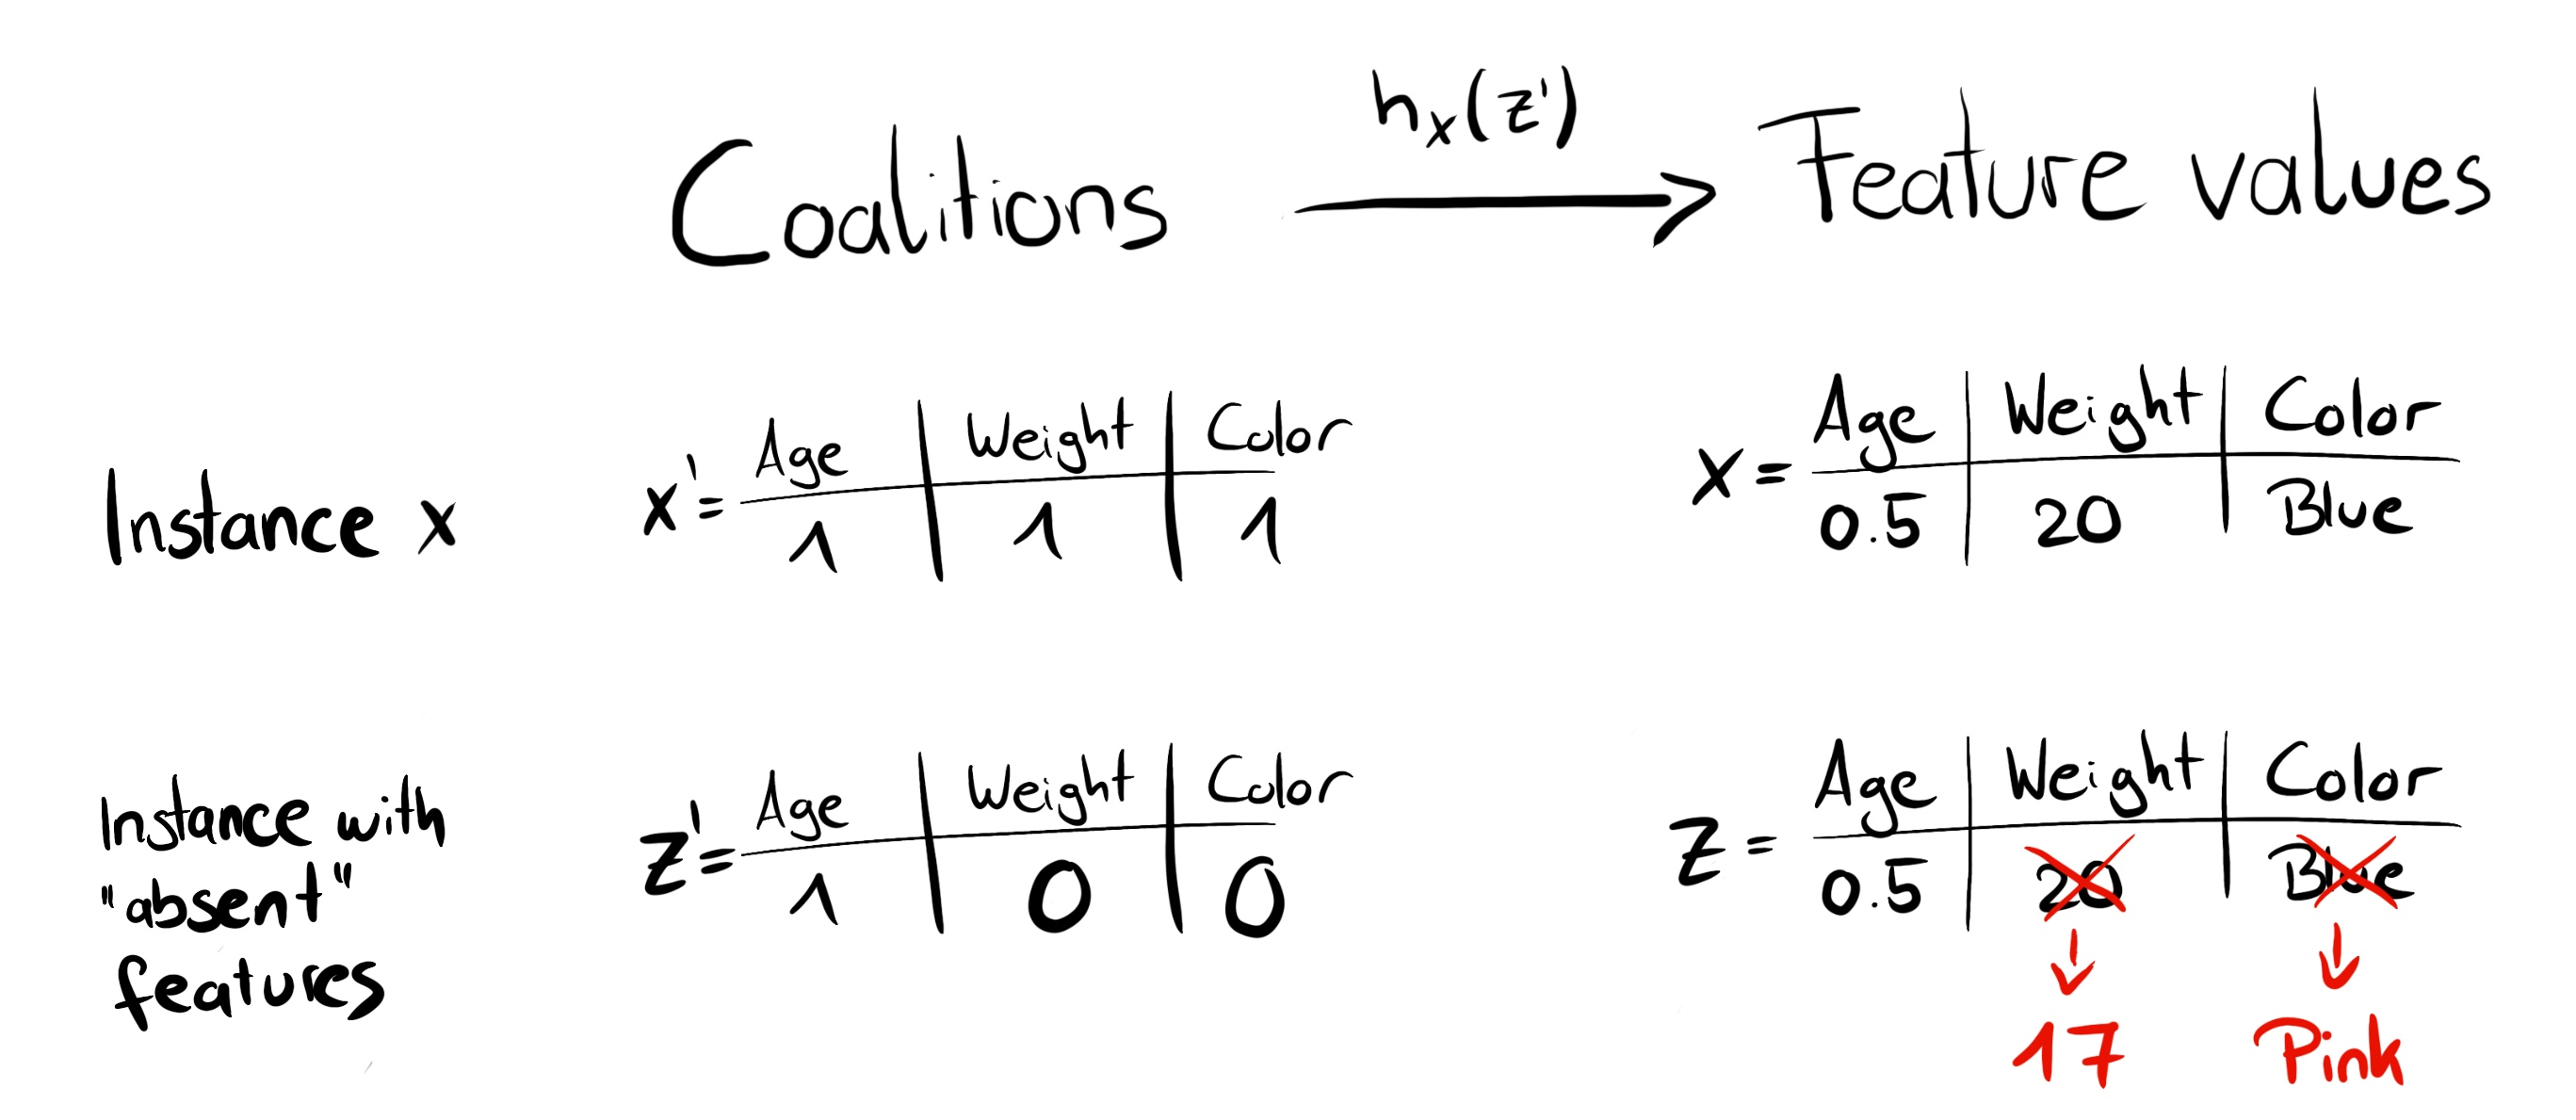

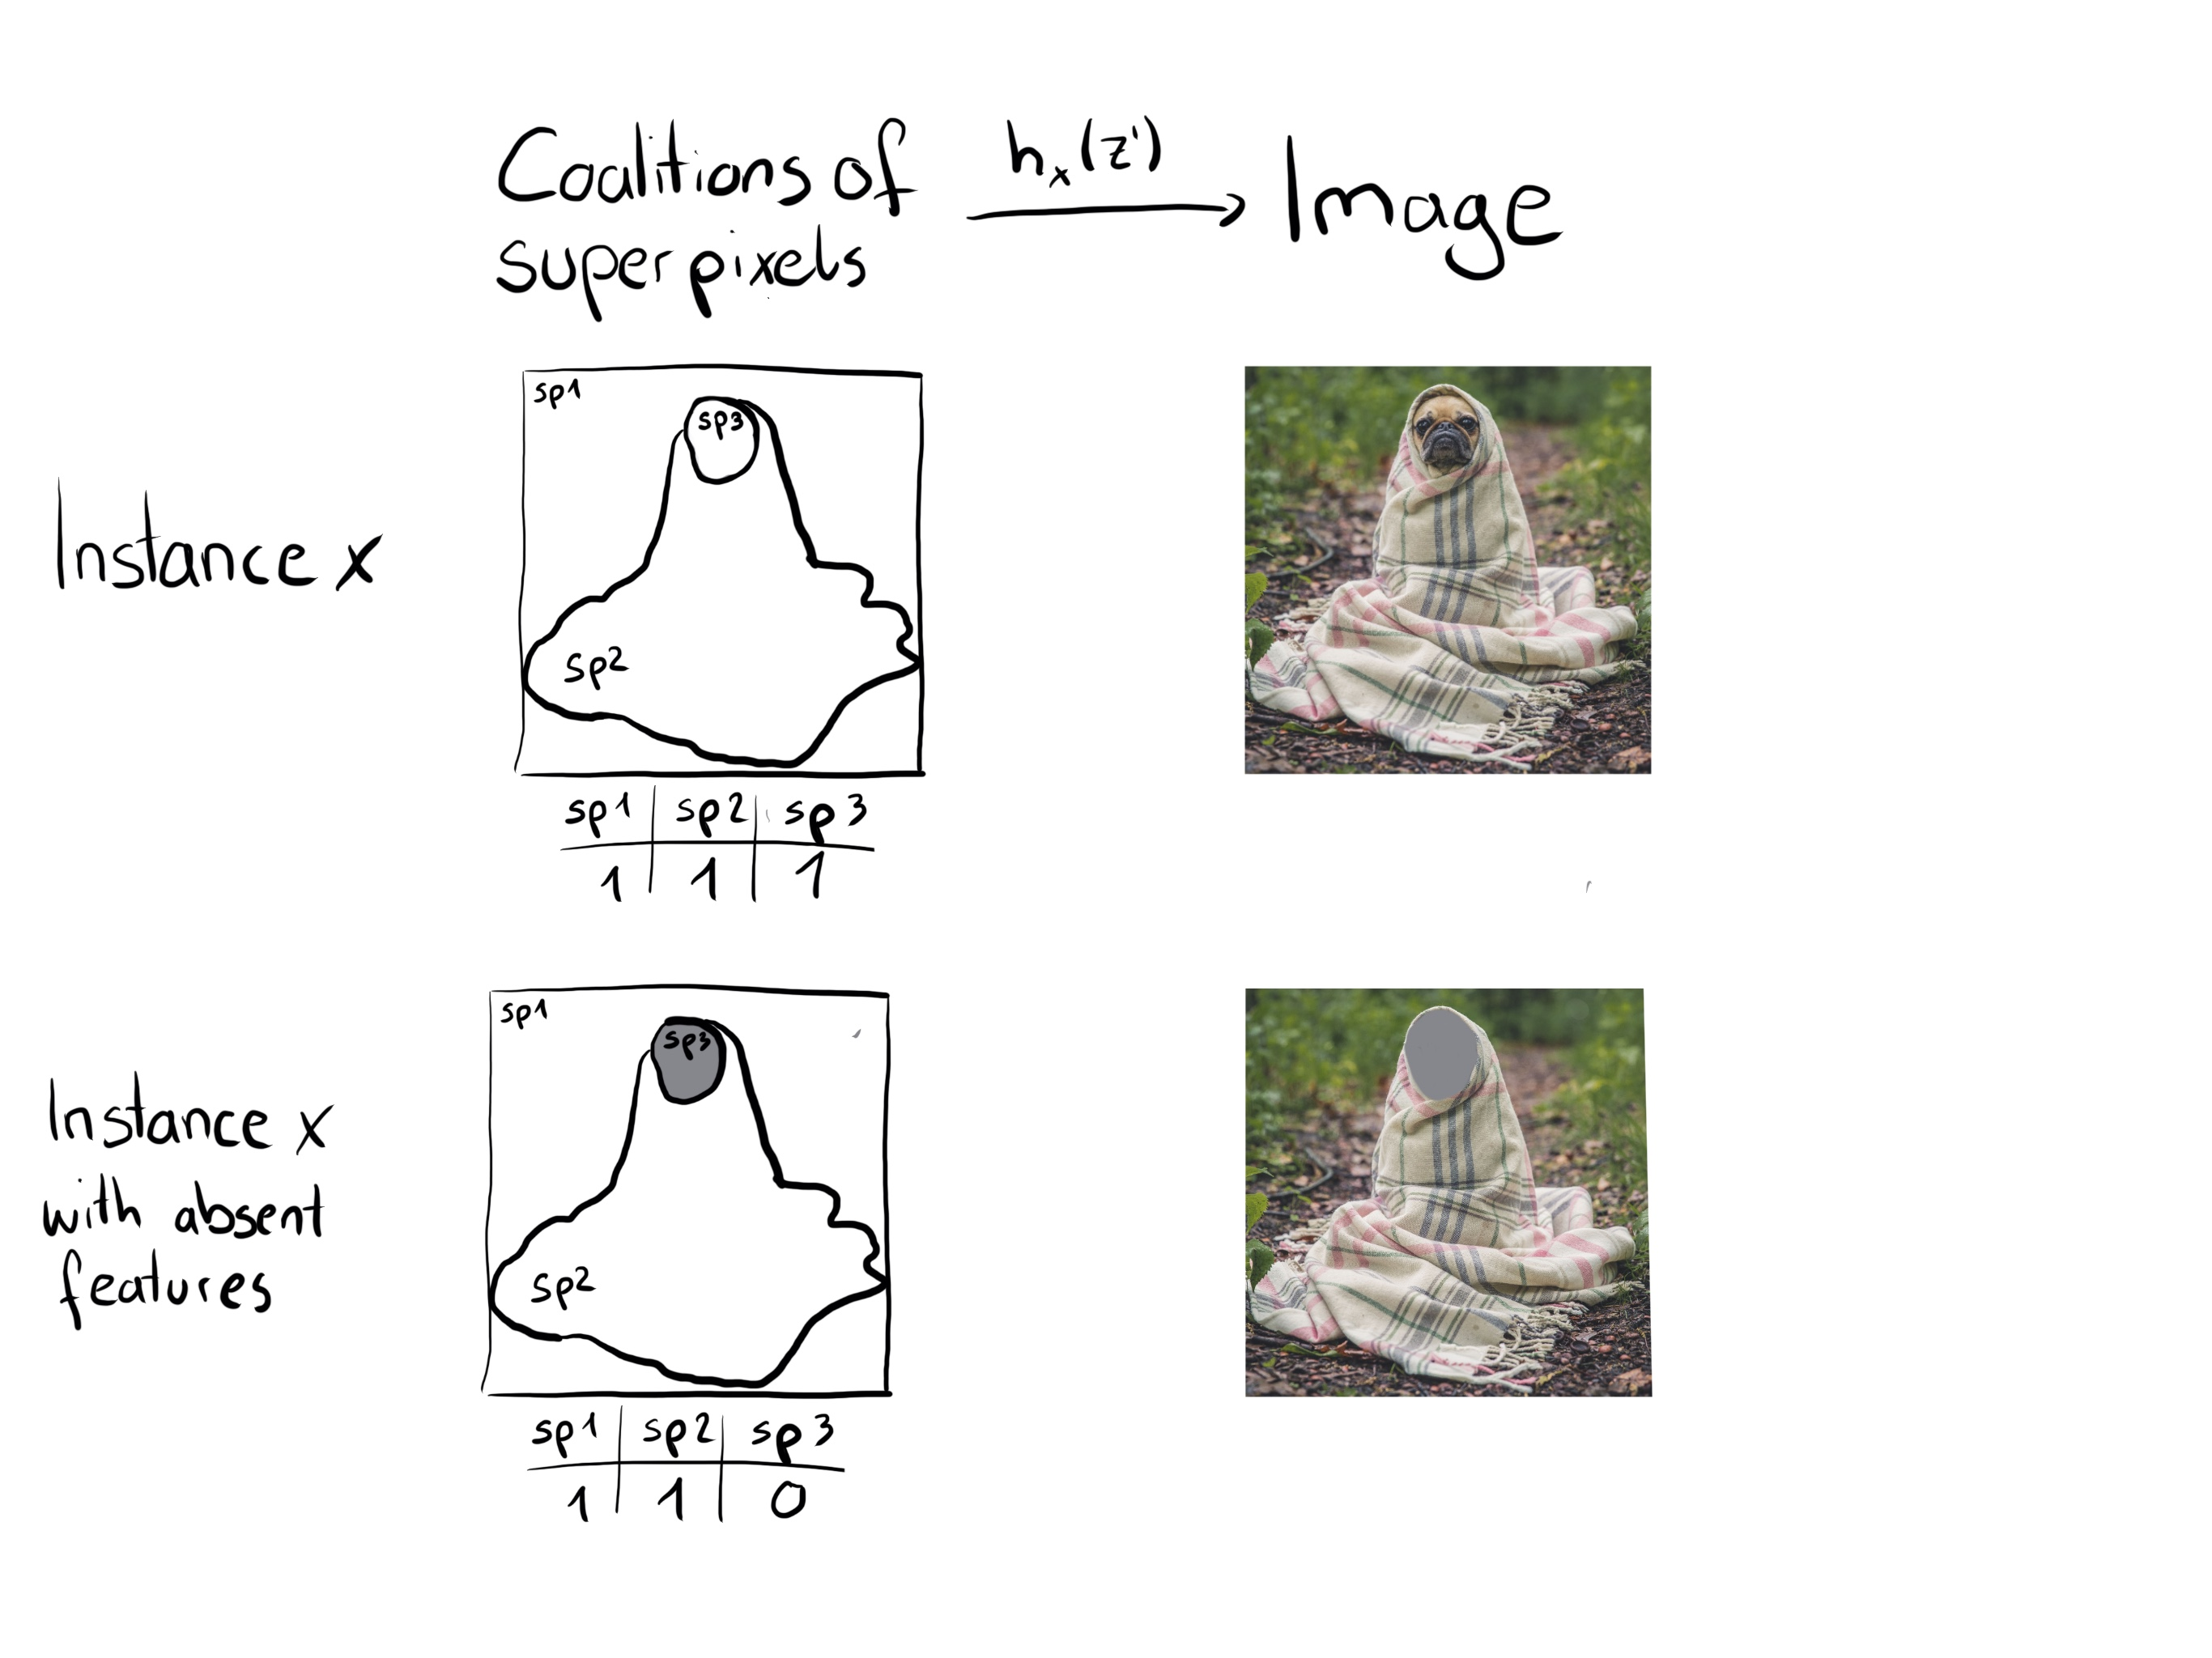

**3️⃣ Attribution des poids aux coalitions**
Toutes les coalitions n’ont pas la même importance. On attribue un **poids** à chaque coalition en fonction de la probabilité de la générer. Le noyau de SHAP attribue plus de poids aux coalitions **très petites (1 seule caractéristique présente) et très grandes (toutes sauf une)**.

La **distribution de probabilité** utilisée est :
$$
p(k) = \frac{n-1}{k(n-k)}
$$
où :
- $n$ est le **nombre total de caractéristiques**,
- $k$ est le **nombre de caractéristiques présentes dans la coalition**.

Cela signifie que :
- Les coalitions avec **très peu ou presque toutes les caractéristiques** ont un poids plus élevé.
- Les coalitions de taille intermédiaire sont moins importantes.

**4️⃣ Régression pondérée pour estimer les valeurs de Shapley**
On ajuste ensuite un **modèle de régression linéaire pondérée** :

$$
g(z') = \phi_0 + \sum_{j=1}^{n} \phi_j z'_j
$$

où :
- $g$ est le **modèle de régression linéaire**,
- $\phi_j$ sont les **valeurs de Shapley estimées** (les coefficients du modèle),
- $z'_j$ est le **vecteur de coalition**.

On minimise l’erreur quadratique pondérée :

$$
L(\hat{f}, g, \pi_x) = \sum_{z'} \pi_x(z') \left[ \hat{f}(h_x(z')) - g(z') \right]^2
$$

où $\pi_x(z')$ est le poids attribué à chaque coalition.

---



🔬 **Interprétation des résultats**
Une fois la régression ajustée, les coefficients $\phi_j$ sont les **valeurs de Shapley estimées**.  
Elles indiquent **la contribution marginale moyenne** de chaque caractéristique à la prédiction.

**📌 Différences entre KernelSHAP et LIME**
| 🔍 Méthode | 🔥 Caractéristique principale |
|------------|-----------------------------|
| **LIME**   | Approximation locale basée sur un modèle linéaire pondéré selon la distance. |
| **SHAP**   | Approximation basée sur la théorie des jeux, garantissant des contributions équitables (valeurs de Shapley). |
📌 **Mapping des coalitions vers des instances valides**
- **Pour les données tabulaires** : lorsqu’une caractéristique est absente ($z'_j = 0$), elle est remplacée par **une valeur issue du dataset**.
- **Pour les images** : lorsqu’un superpixel est absent, il est remplacé par **une zone grisée ou floutée**.

---

🎯 **Résumé**
✅ **KernelSHAP permet d’estimer les valeurs de Shapley de manière efficace.**  
✅ Il fonctionne en **perturbant les caractéristiques** et en **observant les changements de prédiction**.  
✅ **Contrairement à LIME**, il garantit des explications **théoriquement justes**.  
✅ **Il est coûteux en calcul** mais fonctionne bien pour les modèles non arborescents.

---


### 🌳 **4.6.3 TreeSHAP**
**TreeSHAP** est une version optimisée de SHAP conçue pour les modèles **basés sur des arbres** (arbres de décision, forêts aléatoires, gradient boosting).

#### **🚀 Pourquoi TreeSHAP est plus rapide ?**
- **KernelSHAP a une complexité exponentielle $O(T L^2 M)$**
- **TreeSHAP réduit cette complexité à $O(T L D^2)$**  
  où :
  - $T$ = nombre d’arbres,
  - $L$ = nombre maximal de feuilles par arbre,
  - $D$ = profondeur maximale des arbres.

TreeSHAP utilise **l’espérance conditionnelle** des caractéristiques plutôt que l’espérance marginale comme KernelSHAP. Cependant, cette approche peut donner des attributions non intuitives si certaines caractéristiques sont fortement corrélées.

---

### 🏆 **Conclusion**
- **SHAP est une méthode robuste et théoriquement justifiée** pour l’interprétation des modèles de Machine Learning.
- **KernelSHAP** est **une approche universelle** applicable à tous les modèles, mais coûteuse en calcul.
- **TreeSHAP** est **une version optimisée pour les modèles d’arbres**, plus rapide mais parfois moins intuitive.

🔥 **SHAP permet d’obtenir des explications locales (pour une prédiction) et globales (importance des caractéristiques sur l’ensemble des données).** C’est aujourd’hui **l’une des meilleures méthodes pour interpréter un modèle complexe**.

---

https://leanpub.com/shap